In [ ]:
!pip install pytrends

In [ ]:
!pip install seaborn

In [1]:
from pytrends.request import TrendReq
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import json
import time

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [9]:
timezone_offset = -330 # INDIA
# timezone_offset = -480 # Phillipines

pytrends = TrendReq(hl='en-US', tz=timezone_offset, retries=10, backoff_factor=0.5)

In [10]:
date_entry = input('Enter a start date in YYYY-MM-DD format: ')
year, month, day = map(int, date_entry.split('-'))
date1 = datetime.date(year, month, day)

Enter a start date in YYYY-MM-DD format: 2020-01-10


In [11]:
date_entry = input('Enter a end date in YYYY-MM-DD format: ')
year, month, day = map(int, date_entry.split('-'))
date2 = datetime.date(year, month, day)

Enter a end date in YYYY-MM-DD format: 2020-07-22


In [12]:
t_frame = date1.strftime("%Y-%m-%d") + " " + date2.strftime("%Y-%m-%d")
t_frame

'2020-01-10 2020-07-22'

In [13]:
cat_df = pd.read_csv("categories_defined.csv")
cat_names = cat_df["name"].tolist()
cat_ids = cat_df["id"].tolist()

In [15]:
interest_df = pd.DataFrame()
interest_monthly_df = pd.DataFrame()

## Category Level Call
for i in range(len(cat_ids[:5])):
    # print(i, cat_ids[i], cat_names[i])
    if(i%10==1):
        time.sleep(5)
    try:
        pytrends.build_payload([""], cat=cat_ids[i], timeframe=t_frame, geo='PH', gprop='')
    except:
        time.sleep(60)
        pytrends.build_payload([""], cat=cat_ids[i], timeframe=t_frame, geo='PH', gprop='')

    data = pytrends.interest_over_time()
    if(data.empty):
        print(cat_names[i], "has no results")
        continue
    data = pd.DataFrame(data.to_records())
    data1 = data[["date",""]]
    data1.columns = ['date', 'hits']
    data1['date'] = data1['date'].dt.date
    data1["keyword"] = cat_names[i]
    data1["geo"] = "PH"
    data1["time"] = t_frame
    data1["gprop"] = "web"
    data1["category"] = cat_ids[i]
    interest_df = interest_df.append(data1)
    
    # Group data in monthly
    # print(data)
    g = data[["date",""]].set_index("date").groupby(pd.Grouper(freq="M"))
    g = pd.DataFrame(g.sum().to_records())
    g["date"] = g["date"] - pd.tseries.offsets.MonthBegin(1)
    g.columns = ["date", "hits"]
    g['date'] = g['date'].dt.date
    g["keyword"] = cat_names[i]
    g["geo"] = "PH"
    g["time"] = t_frame
    g["gprop"] = "web"
    g["category"] = cat_ids[i]
    
    interest_monthly_df = interest_monthly_df.append(g)

Babies & Toddlers has no results


In [16]:
interest_df.reset_index().to_csv("interest_over_time.csv")
interest_df

,date,hits,keyword,geo,time,gprop,category
0,2020-01-10,79,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
1,2020-01-11,62,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
2,2020-01-12,76,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
3,2020-01-13,52,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
4,2020-01-14,54,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
...,...,...,...,...,...,...,...
189,2020-07-17,31,Athletic Apparel,PH,2020-01-10 2020-07-22,web,983
190,2020-07-18,37,Athletic Apparel,PH,2020-01-10 2020-07-22,web,983
191,2020-07-19,38,Athletic Apparel,PH,2020-01-10 2020-07-22,web,983
192,2020-07-20,33,Athletic Apparel,PH,2020-01-10 2020-07-22,web,983


In [17]:
interest_monthly_df.reset_index().to_csv("interest_monthly_df.csv")
interest_monthly_df

,date,hits,keyword,geo,time,gprop,category
0,2020-01-01,1295,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
1,2020-02-01,1604,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
2,2020-03-01,1969,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
3,2020-04-01,1635,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
4,2020-05-01,1711,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
5,2020-06-01,1574,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
6,2020-07-01,1129,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
0,2020-01-01,1967,Apparel,PH,2020-01-10 2020-07-22,web,68
1,2020-02-01,2500,Apparel,PH,2020-01-10 2020-07-22,web,68
2,2020-03-01,1935,Apparel,PH,2020-01-10 2020-07-22,web,68


In [18]:
i = 0
print(cat_ids[i], cat_names[i])
pytrends.build_payload([""], cat=cat_ids[i], timeframe=t_frame, geo='PH', gprop='')
data = pd.DataFrame(pytrends.interest_over_time().to_records())
if(data.empty):
    print("continue")
data1 = pd.DataFrame(data.to_records())
data1 = data1[["date",""]]
data1.columns = ['date', 'hits']
data1['date'] = data1['date'].dt.date
data1["keyword"] = cat_names[i]
data1["geo"] = "PH"
data1["time"] = t_frame
data1["gprop"] = "web"
data1["category"] = cat_ids[i]
data1

277 Alcoholic Beverages


,date,hits,keyword,geo,time,gprop,category
0,2020-01-10,79,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
1,2020-01-11,62,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
2,2020-01-12,76,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
3,2020-01-13,52,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
4,2020-01-14,54,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
...,...,...,...,...,...,...,...
189,2020-07-17,56,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
190,2020-07-18,60,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
191,2020-07-19,58,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
192,2020-07-20,45,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277


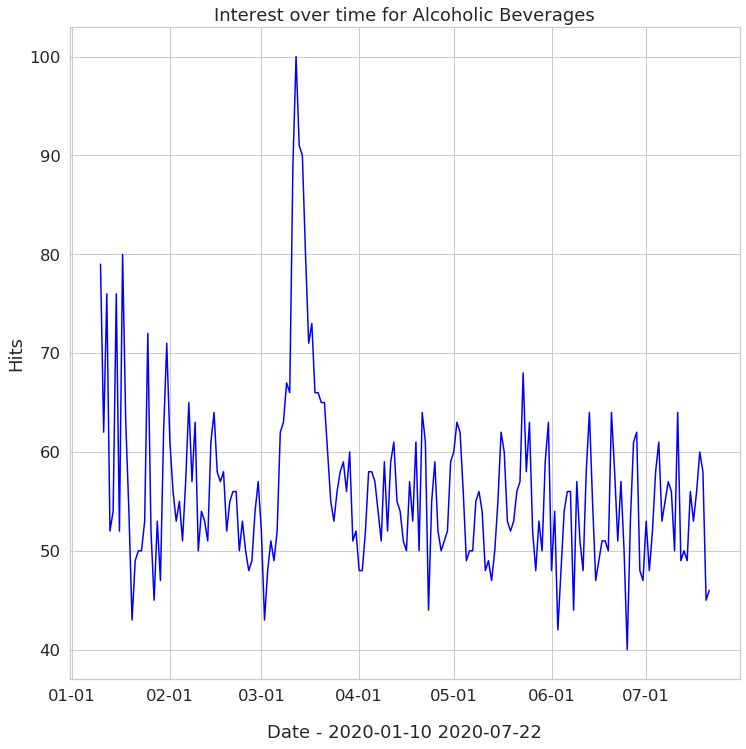

In [19]:
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")
date_form = DateFormatter("%m-%d")
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))
x = data1.date.tolist()
y = data1.hits
ax.plot(x, y, color="blue")
ax.set(xlabel="Date - %s" % t_frame,
       ylabel="Hits",
       title="Interest over time for %s" % cat_names[i])
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.labelpad = 20
plt.show()

In [20]:
data1.set_index("date")

,hits,keyword,geo,time,gprop,category
date,,,,,,
2020-01-10,79,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
2020-01-11,62,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
2020-01-12,76,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
2020-01-13,52,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
2020-01-14,54,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
...,...,...,...,...,...,...
2020-07-17,56,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
2020-07-18,60,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
2020-07-19,58,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277


In [22]:
# Group data in monthly

g = data[["date",""]].set_index("date").groupby(pd.Grouper(freq="M"))
g = pd.DataFrame(g.sum().to_records())
g["date"] = g["date"] - pd.tseries.offsets.MonthBegin(1)
g.columns = ["date", "hits"]
g

,date,hits
0,2020-01-01,1295
1,2020-02-01,1604
2,2020-03-01,1969
3,2020-04-01,1635
4,2020-05-01,1711
5,2020-06-01,1574
6,2020-07-01,1129


In [21]:
data1

,date,hits,keyword,geo,time,gprop,category
0,2020-01-10,79,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
1,2020-01-11,62,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
2,2020-01-12,76,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
3,2020-01-13,52,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
4,2020-01-14,54,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
...,...,...,...,...,...,...,...
189,2020-07-17,56,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
190,2020-07-18,60,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
191,2020-07-19,58,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
192,2020-07-20,45,Alcoholic Beverages,PH,2020-01-10 2020-07-22,web,277
